### import libs
- preprocessing
- model
- cross validation, hyper parameter
- visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### load datasets and quick view

In [13]:
train_df = pd.read_csv("res/titanic/train.csv")
test_df = pd.read_csv("res/titanic/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
print(train_df.isnull().sum())
train_df = train_df.dropna()
print()
print(train_df.isnull().sum())
print(train_df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket     

In [18]:
train_df = pd.read_csv("res/titanic/train.csv")

train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
train_df["Cabin"].fillna("N", inplace=True)
train_df = train_df.dropna()
print()
print(train_df.isnull().sum())
print(train_df.info())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


### Exploratory Data Analysis

In [25]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [26]:
print(train_df["Cabin"].value_counts())

N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
D19              1
C50              1
F38              1
D30              1
D47              1
Name: Cabin, Length: 147, dtype: int64


In [27]:
print(train_df["Sex"].value_counts())

male      577
female    312
Name: Sex, dtype: int64


In [28]:
print(train_df["Survived"].value_counts())

0    549
1    340
Name: Survived, dtype: int64


In [29]:
print(train_df["Pclass"].value_counts())

3    491
1    214
2    184
Name: Pclass, dtype: int64


In [40]:
train_df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [32]:
train_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

In [34]:
train_df.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [38]:
train_df.groupby(["Age", "Survived"])["Survived"].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 144, dtype: int64

In [49]:
train_df["Parch"].value_countsunts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### visualization

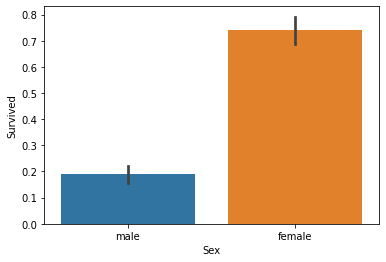

In [37]:
sns.barplot(x="Sex", y="Survived",data=train_df)

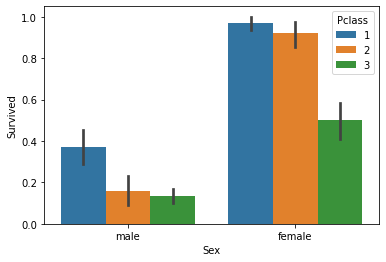

In [39]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)

In [43]:
def get_categroy(age):
    cat = ""
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else : cat = "Elderly"
    return cat

train_df["AgeGroup"] = train_df["Age"].apply(lambda x : get_categroy(x))
train_df["AgeGroup"].value_counts()

Young Adult    373
Adult          194
Student        162
Teenager        70
Baby            44
Child           25
Elderly         21
Name: AgeGroup, dtype: int64

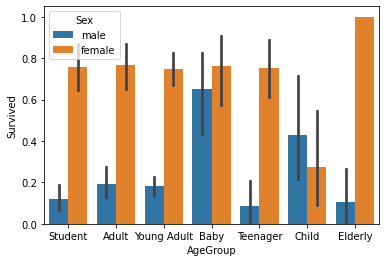

In [47]:
sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=train_df)

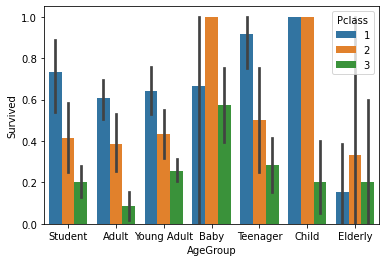

In [48]:
sns.barplot(x="AgeGroup", y="Survived", hue="Pclass", data=train_df)

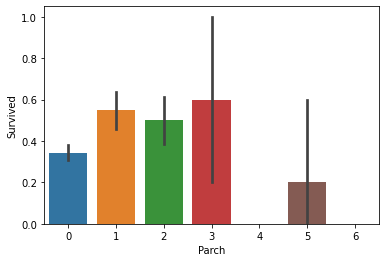

In [51]:
sns.barplot(x="Parch", y="Survived", data=train_df)

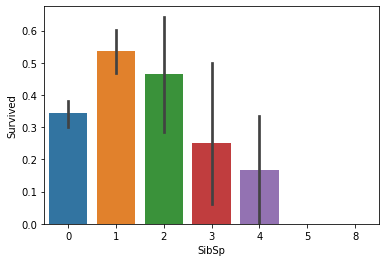

In [53]:
sns.barplot(x="SibSp", y="Survived", data=train_df)

### Encoding

In [64]:
def encoding(df):
    features = ["Cabin", "Sex", "Embarked", "AgeGroup"]

    for feature in features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    
    return df

train_df = encoding(train_df)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,1,22.0,1,0,7.2500,145,2,4
1,2,1,1,0,38.0,1,0,71.2833,80,0,0
2,3,1,3,0,26.0,0,0,7.9250,145,2,6
3,4,1,1,0,35.0,1,0,53.1000,54,2,6
4,5,0,3,1,35.0,0,0,8.0500,145,2,6


In [65]:
train_df.drop(["Name", "Ticket"], axis=1, inplace=True)
train_df.head()

KeyError: "['Name' 'Ticket'] not found in axis"

###  find best estimator and hyper param using GridSearchCV

In [67]:
X = train_df.loc[:,train_df.columns != "Survived"]
y = train_df.loc[:,train_df.columns == "Survived"]

rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()

param = {
    "max_depth" : [3, 4, 5, 6],
    "min_samples_split" :[2, 3, 4, 5]
}

rf_gs = GridSearchCV(rf_clf, param_grid=param, cv=5, refit=True)
dt_gs = GridSearchCV(dt_clf, param_grid=param, cv=5, refit=True)

rf_gs.fit(X, y)
dt_gs.fit(X, y)

print("Random Forest")
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print("\n\ndecision tree")
print(dt_gs.best_score_)
print(dt_gs.best_params_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

Random Forest
0.8290547832158953
{'max_depth': 5, 'min_samples_split': 2}


decision tree
0.7908461880276774
{'max_depth': 5, 'min_samples_split': 3}
